In [2]:
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
    
# 让结果在notebook中显示
%matplotlib inline

In [3]:
data = pd.read_csv("bj_housing.csv")
prices = data['Value'] #y
features = data.drop('Value',axis=1)  #X


In [4]:
data.describe()

,Area,Room,Living,School,Year,Floor
0,128,3,1,1,2004,21
1,68,1,2,1,2000,6
2,125,3,2,0,2003,5
3,129,2,2,0,2005,16
4,118,3,2,0,2003,6
5,58,1,1,0,2003,22
6,104,3,1,0,2001,6
7,198,3,2,0,2005,7
8,98,3,1,1,1990,12
9,97,2,1,1,1990,10


In [19]:
from sklearn.model_selection import train_test_split

X,y = features,prices
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,
                                                    random_state=30)


In [5]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    
    score = r2_score(y_true,y_predict)

    return score

In [6]:
# 计算这个模型的预测结果的决定系数


score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])


print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


(7999, 6) (7999, 1)


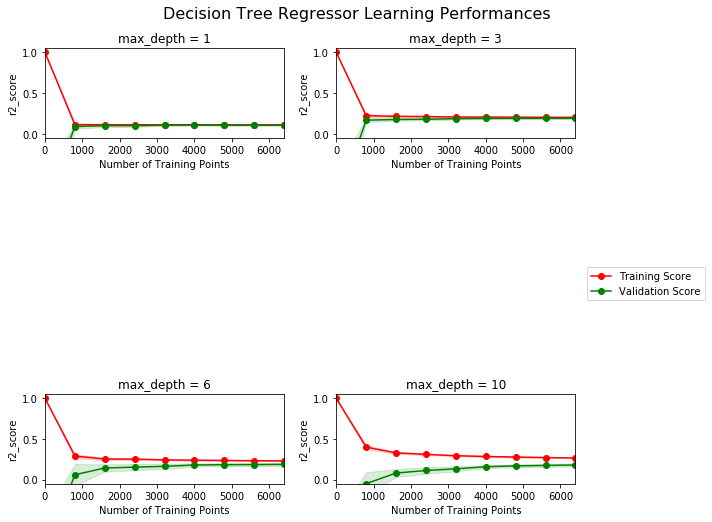

In [28]:
# 根据不同的训练集大小，和最大深度，生成学习曲线
y_train = np.array(y_train).reshape(-1,1)
#print y_train
print X_train.shape, y_train.shape
vs.ModelLearning(y_train, X_train)

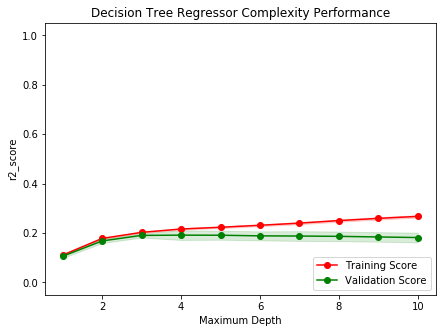

In [29]:
# 根据不同的最大深度参数，生成复杂度曲线
vs.ModelComplexity(y_train, X_train)

In [30]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold()
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(estimator=regressor,param_grid=params,
                        scoring=scoring_fnc,cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    
    #print pd.DataFrame(grid.cv_results_)

    # 返回网格搜索后的最优模型
    return grid.best_estimator_

In [31]:
# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print "Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth'])

Parameter 'max_depth' is 6 for the optimal model.


In [32]:
# 生成三个客户的数据
client_data = [[40, 2, 1, 0, 2000, 6], # 客户 1
               [20, 3, 2, 0, 2010, 12], # 客户 2
               [60, 4, 2, 0, 2015, 4]]  # 客户 3

# 进行预测
predicted_price = optimal_reg.predict(client_data)

for i, price in enumerate(predicted_price):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $142.63
Predicted selling price for Client 2's home: $142.63
Predicted selling price for Client 3's home: $227.67
